# Iris flowers classification-an example of supervised learning algorithms

In [1]:
#importing different packages
import pandas as pd                                                              
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
names=["sepal_length","sepal_width","petal_length","petal_width","species"]      #naming the features and labelling
iris=pd.read_csv("iris.data",names=names)                                        #loading the dataset

In [3]:
print(iris.shape)                #150 instances and 5 columns

(150, 5)


In [4]:
print(iris.head(20))             #printing first 20 instances

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
iris.info()                  #checking for consistency of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
print(iris.describe())               #dataframe stastical summary

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(iris.groupby('species').size())           #checking size of each species

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


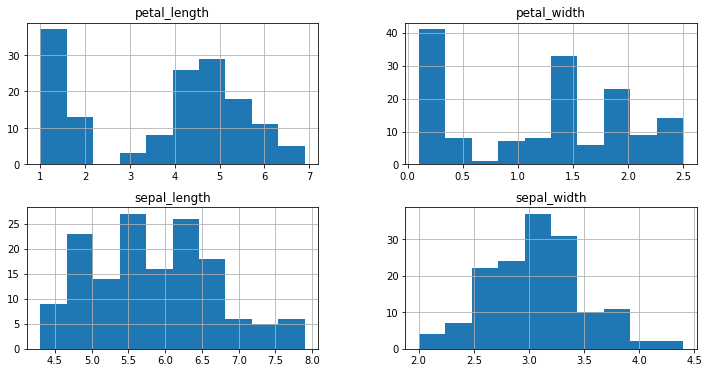

In [8]:
#visualizing distribution of length and width
fig=iris.hist()                     
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Eploratory Data Analysis 

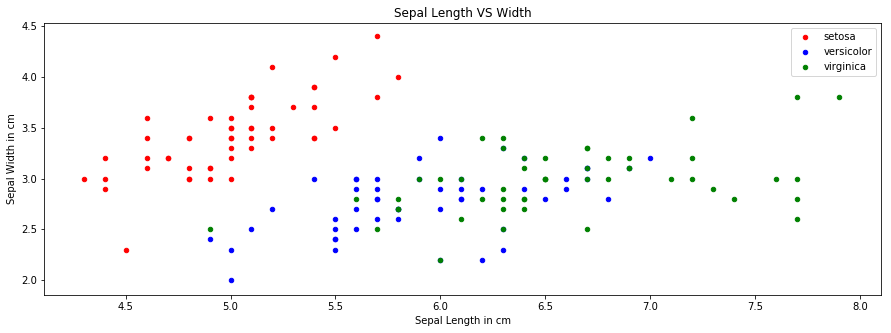

In [9]:
#Plotting scatter plot to depict the relationship between sepal_length and sepal_width
fig=iris[iris.species=="Iris-setosa"].plot(kind='scatter',x='sepal_length',y='sepal_width',color='red',label='setosa')
iris[iris.species=="Iris-versicolor"].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue',label='versicolor',ax=fig)
iris[iris.species=="Iris-virginica"].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green',label='virginica',ax=fig)
fig.set_xlabel("Sepal Length in cm")
fig.set_ylabel("Sepal Width in cm")
fig.set_title("Sepal Length VS Width")                       
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

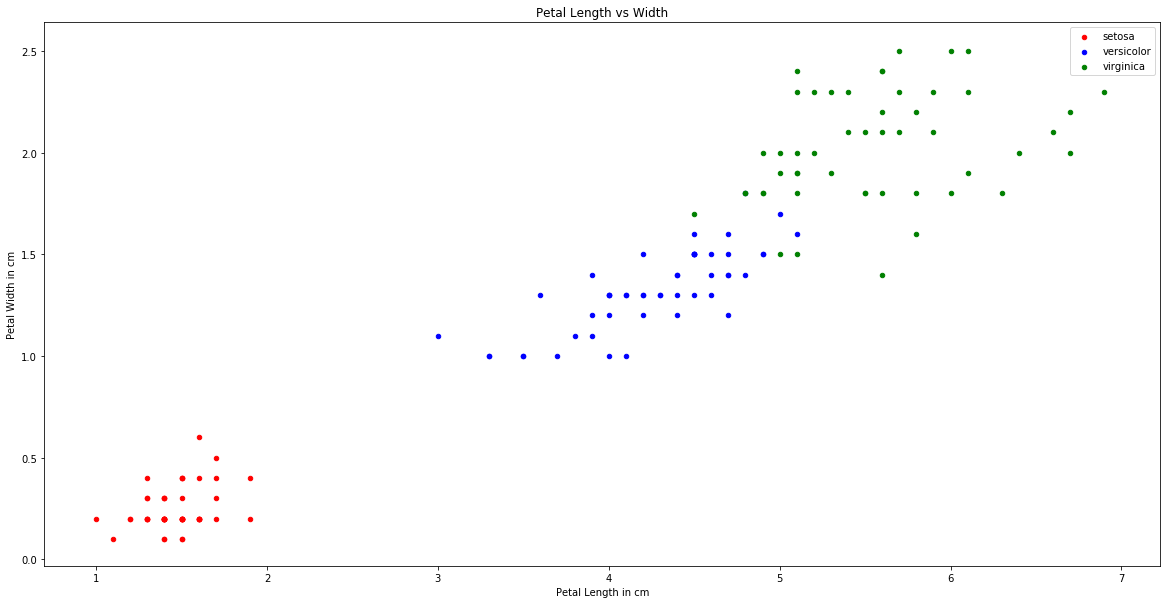

In [10]:
#Plotting scatter plot to depict the relationship between petal_length and petal_width
fig=iris[iris.species=="Iris-setosa"].plot(kind='scatter',x='petal_length',y='petal_width',color='red',label='setosa')
iris[iris.species=="Iris-versicolor"].plot(kind='scatter',x='petal_length',y='petal_width',color='blue',label='versicolor',ax=fig)
iris[iris.species=="Iris-virginica"].plot(kind='scatter',x='petal_length',y='petal_width',color='green',label='virginica',ax=fig)
fig.set_xlabel("Petal Length in cm")
fig.set_ylabel("Petal Width in cm")
fig.set_title("Petal Length vs Width")
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

### As its visible that Petal features gives a better cluster division than the Sepal features,to inference using Petal features will give more accurate prediction.
### Proved later on.

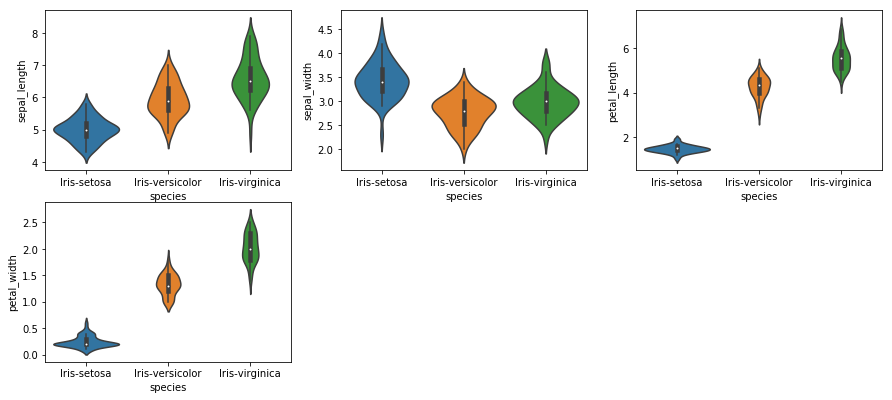

In [11]:
#plotting violinplot to visualize how length and width vary according to the species
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(3,3,2)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.subplot(3,3,3)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(3,3,4)
sns.violinplot(x='species',y='petal_width',data=iris)




### Violinplot shows the density of the length and width per species.The thinner part denotes lesser density where as broader part shows higher density.

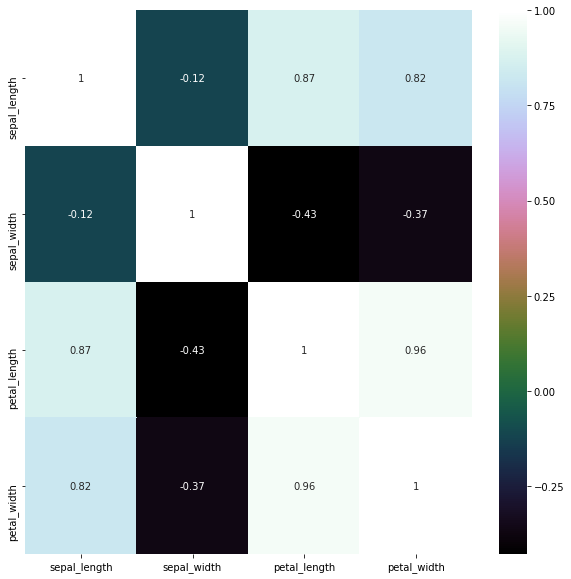

In [12]:
#plotting heatmap to visualize the correlation between the features
plt.figure(figsize=(10,10))
heat_map=sns.heatmap(iris.corr(),cmap='cubehelix',annot=True)
plt.show()

### Inference: petal length and petal width are highly correlated where as sepal length and sepal width are not correlated.
### There may be highly correlated features and training our model upon those features will lower our prediction accuracy.

In [13]:
#splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
train,test=train_test_split(iris,test_size=.3,random_state=0)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


### Not creating a cross validation set because its not required as there are no hyperparameters to be tuned.
### Even if done so,just for confirmation,the accuracy is lesser than the latter part i.e. without k fold validation,as shown below

In [14]:
from sklearn import model_selection
array = iris.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [15]:
from sklearn import svm
from sklearn import metrics
model=svm.SVC()
model.fit(X_train,Y_train)
prediction=model.predict(X_validation)
accuracy=metrics.accuracy_score(Y_validation,prediction)
print("The accuracy of SVM is ",accuracy)

The accuracy of SVM is  0.9555555555555556


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Modelling without k-fold validation now onwards for the task.

In [16]:
train_X=train[['sepal_length','sepal_width','petal_length','petal_width']] #training data features
train_Y=train.species    #output of training data
test_X=test[['sepal_length','sepal_width','petal_length','petal_width']]   #test data features
test_Y=test.species      #output of test data                                         
print(train_X.head(5))
print(test_X.head(2))
train_Y.head()

     sepal_length  sepal_width  petal_length  petal_width
64            5.6          2.9           3.6          1.3
47            4.6          3.2           1.4          0.2
133           6.3          2.8           5.1          1.5
16            5.4          3.9           1.3          0.4
143           6.8          3.2           5.9          2.3
     sepal_length  sepal_width  petal_length  petal_width
83            6.0          2.7           5.1          1.6
130           7.4          2.8           6.1          1.9


64     Iris-versicolor
47         Iris-setosa
133     Iris-virginica
16         Iris-setosa
143     Iris-virginica
Name: species, dtype: object

### Support Vector Machine (SVM)

In [17]:

from sklearn import svm
from sklearn import metrics
model=svm.SVC()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
accuracy=metrics.accuracy_score(test_Y,prediction)
print("The accuracy of SVM is ",accuracy)

The accuracy of SVM is  0.9333333333333333


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print("The accuracy of Logistic Regression is ",metrics.accuracy_score(prediction,test_Y))


The accuracy of Logistic Regression is  0.9777777777777777


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print("The accuracy of Decision Tree is ",metrics.accuracy_score(prediction,test_Y))

The accuracy of Decision Tree is  0.9111111111111111


### K Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=12)              # fitting with n_neighbors=12
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print("The accuracy of K Nearest Neighbors is ",metrics.accuracy_score(prediction,test_Y))


The accuracy of K Nearest Neighbors is  0.9111111111111111


In [21]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)               # fitting with n_neighbors=3
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print("The accuracy of K Nearest Neighbors is ",metrics.accuracy_score(prediction,test_Y))


The accuracy of K Nearest Neighbors is  0.9555555555555556


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()                            # fitting with n_neighbors=default i.e. 5
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print("The accuracy of K Nearest Neighbors is ",metrics.accuracy_score(prediction,test_Y))


The accuracy of K Nearest Neighbors is  0.9333333333333333


### It is to be observed that value of n_neighbors is related to the prediction's accuracy.This can vary as per the type and quality of dataset.

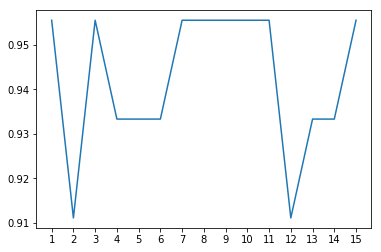

In [23]:
#plotting value of accuracy vs n_neighbors 
a_index=list(range(1,16))
a=pd.Series()
for i in list(range(1,16)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(a_index)
plt.show()

### Training previously used algorithms with sepal and petal features separately.Proving previously stated point i.e. training model using petal features will give better accuracy vs sepal features. 

In [24]:
#creating sepal and petal training data
sepal=[['sepal_length','sepal_width']]
petal=[['petal_length','petal_width']]

In [25]:
#splitting and training
train_s,test_s=train_test_split(sepal,test_size=.3,random_state=0)
train_X_s=train[['sepal_length','sepal_width']]
train_Y_s=train.species
test_X_s=test[['sepal_length','sepal_width']]
test_Y_s=test.species

train_p,test_p=train_test_split(sepal,test_size=.3,random_state=0)
train_X_p=train[['petal_length','petal_width']]
train_Y_p=train.species
test_X_p=test[['petal_length','petal_width']]
test_Y_p=test.species

print(train_X_s.head(5))
print(test_X_s.head(2))
train_Y_s.head()

print(train_X_p.head(5))
print(test_X_p.head(2))
train_Y_p.head()

     sepal_length  sepal_width
64            5.6          2.9
47            4.6          3.2
133           6.3          2.8
16            5.4          3.9
143           6.8          3.2
     sepal_length  sepal_width
83            6.0          2.7
130           7.4          2.8
     petal_length  petal_width
64            3.6          1.3
47            1.4          0.2
133           5.1          1.5
16            1.3          0.4
143           5.9          2.3
     petal_length  petal_width
83            5.1          1.6
130           6.1          1.9


64     Iris-versicolor
47         Iris-setosa
133     Iris-virginica
16         Iris-setosa
143     Iris-virginica
Name: species, dtype: object

### SVM

In [26]:
model=svm.SVC()
model.fit(train_X_s,train_Y_s)
prediction=model.predict(test_X_s)
print("The accuracy of SVM using sepal's features is ",metrics.accuracy_score(prediction,test_Y_s))


model=svm.SVC()
model.fit(train_X_p,train_Y_p)
prediction=model.predict(test_X_p)
print("The accuracy of SVM using petal's features is ",metrics.accuracy_score(prediction,test_Y_p))

The accuracy of SVM using sepal's features is  0.8222222222222222
The accuracy of SVM using petal's features is  0.9555555555555556


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regression

In [27]:
model=LogisticRegression()
model.fit(train_X_s,train_Y_s)
prediction=model.predict(test_X_s)
print("The accuracy of Logistic Regression using sepal's features is ",metrics.accuracy_score(prediction,test_Y_s))


model=LogisticRegression()
model.fit(train_X_p,train_Y_p)
prediction=model.predict(test_X_p)
print("The accuracy of Logistic Regression using petal's features is ",metrics.accuracy_score(prediction,test_Y_p))

The accuracy of Logistic Regression using sepal's features is  0.7111111111111111
The accuracy of Logistic Regression using petal's features is  0.9111111111111111


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [28]:
model=DecisionTreeClassifier()
model.fit(train_X_s,train_Y_s)
prediction=model.predict(test_X_s)
print("The accuracy of Decision Tree using sepal's features is ",metrics.accuracy_score(prediction,test_Y_s))


model=DecisionTreeClassifier()
model.fit(train_X_p,train_Y_p)
prediction=model.predict(test_X_p)
print("The accuracy of Decision Tree using petal's features is ",metrics.accuracy_score(prediction,test_Y_p))

The accuracy of Decision Tree using sepal's features is  0.6666666666666666
The accuracy of Decision Tree using petal's features is  0.9111111111111111


### KNN

In [29]:
model=KNeighborsClassifier()
model.fit(train_X_s,train_Y_s)
prediction=model.predict(test_X_s)
print("The accuracy of KNN using sepal's features is ",metrics.accuracy_score(prediction,test_Y_s))


model=KNeighborsClassifier()
model.fit(train_X_p,train_Y_p)
prediction=model.predict(test_X_p)
print("The accuracy of KNN using petal's features is ",metrics.accuracy_score(prediction,test_Y_p))

The accuracy of KNN using sepal's features is  0.7777777777777778
The accuracy of KNN using petal's features is  0.9555555555555556


### Its clearly visible training our model over petal features gives better acurracy.